(1458, 3)
Index(['Feature1', 'Feature2', 'Target'], dtype='object')
   Feature1  Feature2  Target
0      0.17     -0.45      -1
1      0.32     -0.89      -1
2      0.86     -0.18       1
3     -0.86     -0.37       1
4      0.34      0.24       1


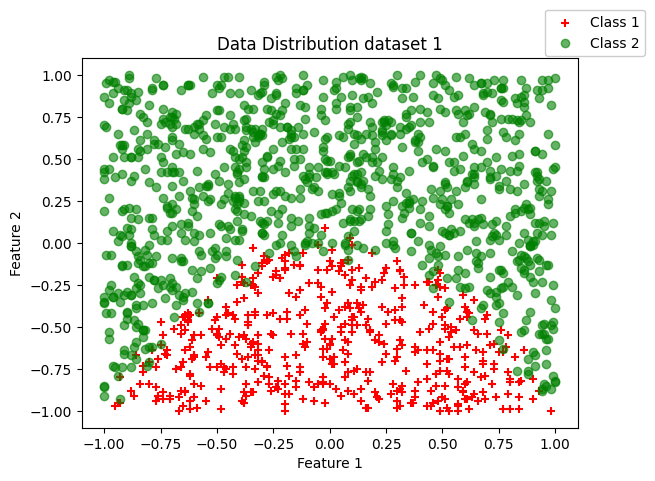

In [132]:
#id : 2-2-2-0 
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, classification_report
import warnings

# Disable warnings
warnings.filterwarnings('ignore')

# Load dataset
data = pd.read_csv('week4.csv',header=None)

print(data.shape)
data.columns = ['Feature1','Feature2', 'Target']
print(data.columns)
print(data.head())


# Copy data 
df_data = data.copy()
X1 = df_data.iloc[:, 0]
X2 = df_data.iloc[:, 1]
X_features = np.column_stack((X1, X2))
y_labels = df_data.iloc[:, 2]

# Plot initial data
plt.scatter(X1[y_labels < 0], X2[y_labels < 0], marker='+', c='r', label="Class 1")
plt.scatter(X1[y_labels > 0], X2[y_labels > 0], marker='o', c='g', label="Class 2",alpha=0.6)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data Distribution dataset 1' )
plt.legend(bbox_to_anchor=(1.15, 1.15), loc='upper right', fancybox=True, framealpha=1)
plt.show()

Regularization: 0.1, Degree: 1 => Accuracy: 0.88 (+/- 0.01)
Regularization: 0.1, Degree: 2 => Accuracy: 0.92 (+/- 0.01)
Regularization: 0.1, Degree: 3 => Accuracy: 0.92 (+/- 0.02)
Regularization: 0.1, Degree: 4 => Accuracy: 0.93 (+/- 0.02)
Regularization: 0.1, Degree: 5 => Accuracy: 0.93 (+/- 0.02)
Regularization: 0.1, Degree: 6 => Accuracy: 0.93 (+/- 0.02)
Regularization: 0.1, Degree: 7 => Accuracy: 0.93 (+/- 0.02)
Regularization: 0.1, Degree: 8 => Accuracy: 0.93 (+/- 0.02)
Regularization: 0.1, Degree: 9 => Accuracy: 0.93 (+/- 0.02)
Regularization: 0.1, Degree: 10 => Accuracy: 0.93 (+/- 0.02)
Regularization: 0.5, Degree: 1 => Accuracy: 0.87 (+/- 0.01)
Regularization: 0.5, Degree: 2 => Accuracy: 0.96 (+/- 0.01)
Regularization: 0.5, Degree: 3 => Accuracy: 0.96 (+/- 0.01)
Regularization: 0.5, Degree: 4 => Accuracy: 0.96 (+/- 0.01)
Regularization: 0.5, Degree: 5 => Accuracy: 0.96 (+/- 0.01)
Regularization: 0.5, Degree: 6 => Accuracy: 0.96 (+/- 0.01)
Regularization: 0.5, Degree: 7 => Accur

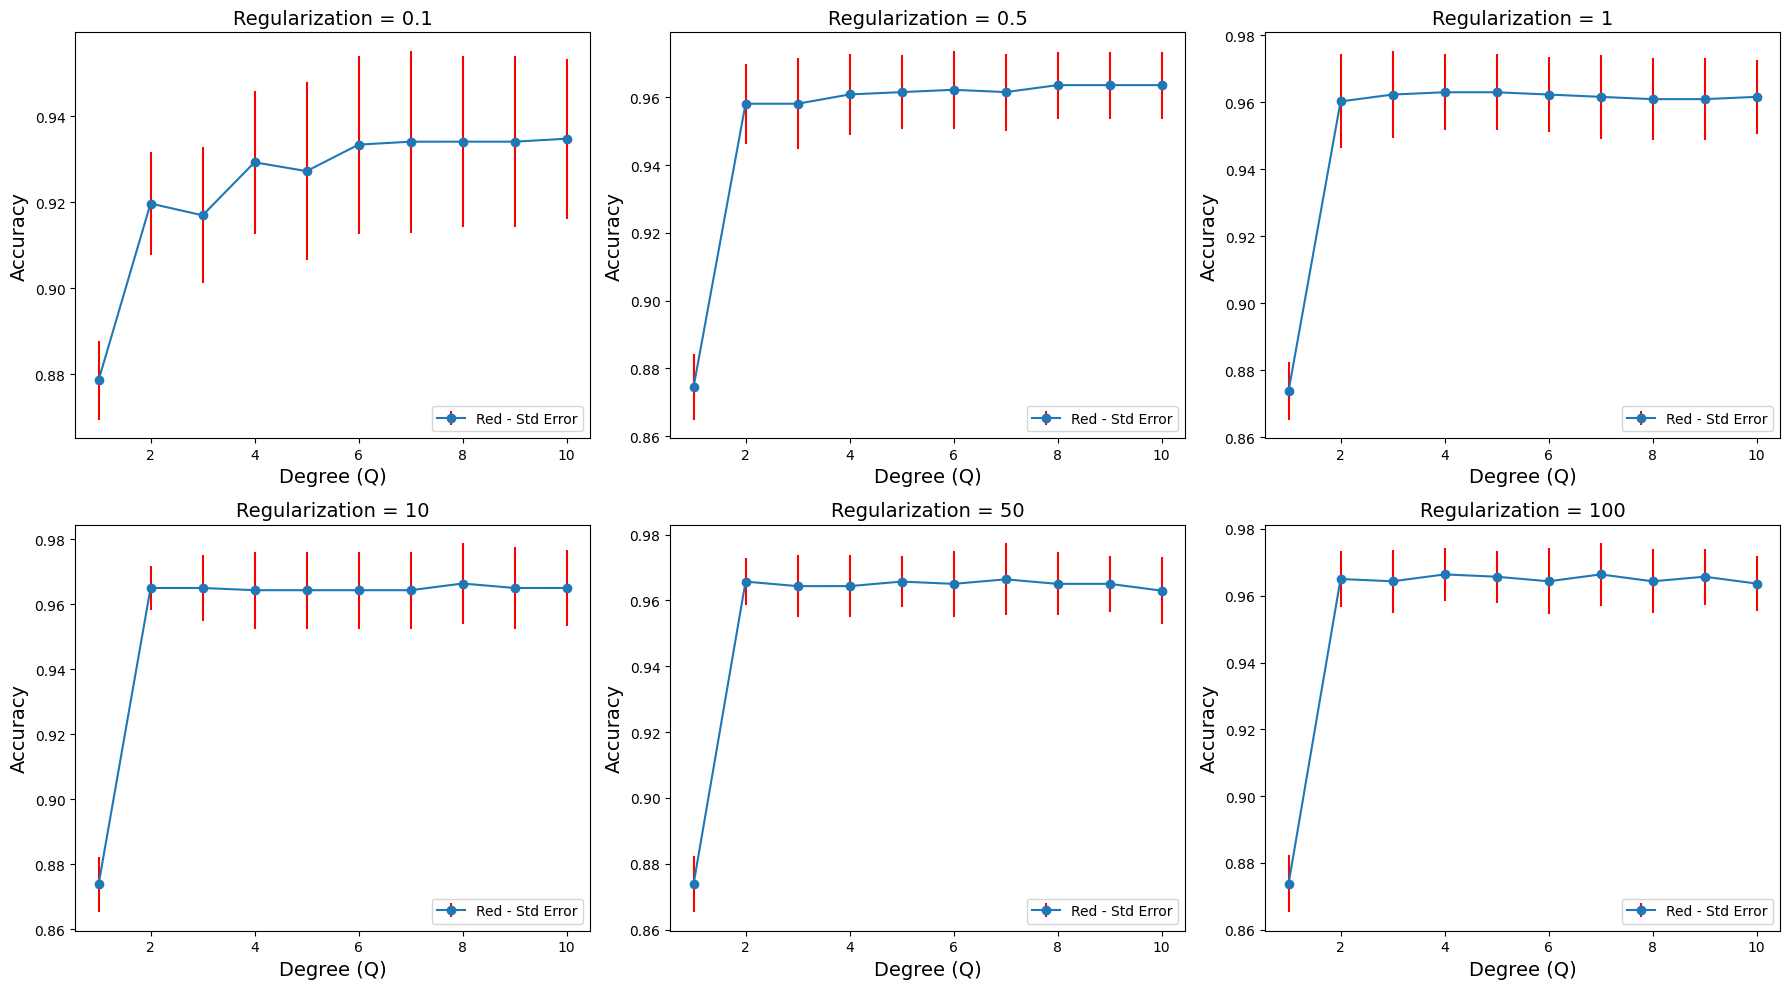

In [133]:
# polynomial degrees and C values
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
penalty_vals = [0.1, 0.5, 1, 10, 50, 100]
kf = KFold(n_splits=5)
accuracy_scores = []

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# Loop over regularization and polynomial degrees
for ix,reg_param in enumerate(penalty_vals):
    poly_means = []
    poly_stds = []
    for deg in degrees:
        X_poly = PolynomialFeatures(deg).fit_transform(X_features)
        temp_accuracy = []
        log_reg_model = LogisticRegression(penalty='l2', C=reg_param, max_iter=10000)
        for train_idx, test_idx in kf.split(X_poly):
            log_reg_model.fit(X_poly[train_idx], y_labels[train_idx])
            y_pred = log_reg_model.predict(X_poly[test_idx])
            temp_accuracy.append(accuracy_score(y_labels[test_idx], y_pred))

        print(f"Regularization: {reg_param}, Degree: {deg} => Accuracy: {np.mean(temp_accuracy):.2f} (+/- {np.std(temp_accuracy):.2f})")
        poly_means.append(np.mean(temp_accuracy))
        poly_stds.append(np.std(temp_accuracy))

    axes[ix].errorbar(degrees, poly_means, yerr=poly_stds, ecolor='red', fmt='-o')
    axes[ix].legend(["Red - Std Error"], loc=4)
    axes[ix].set_xlabel("Degree (Q)",fontsize=14)
    axes[ix].set_ylabel('Accuracy', fontsize=14)
    axes[ix].set_title(f"Regularization = {reg_param}",fontsize=14)
   
plt.tight_layout()
plt.show()

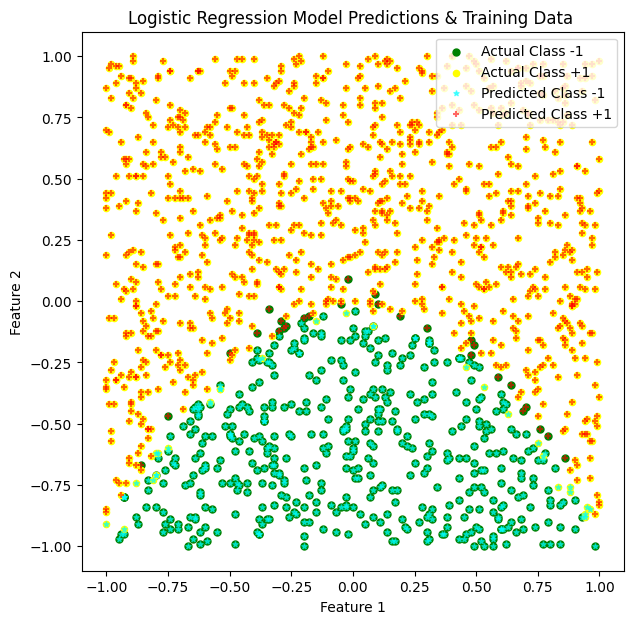

In [134]:
# Final logistic regression model
X_poly_final = PolynomialFeatures(2).fit_transform(X_features)
final_model = LogisticRegression(C=1, random_state=1)
final_model.fit(X_poly_final, y_labels)
y_pred_final = final_model.predict(X_poly_final)

# Plot predicted vs actual
plt.figure(figsize=(7, 7))
plt.scatter(X1[y_labels < 0], X2[y_labels < 0], marker="o", color="green", label="Actual Class -1", s=25)
plt.scatter(X1[y_labels > 0], X2[y_labels > 0], marker="o", color="yellow", label="Actual Class +1", s=20)
plt.scatter(X1[y_pred_final < 0], X2[y_pred_final < 0], marker="*", color="cyan", label="Predicted Class -1", s=15 , alpha=0.6)
plt.scatter(X1[y_pred_final > 0], X2[y_pred_final > 0], marker="+", color="red", label="Predicted Class +1", s=15 , alpha=0.6)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Model Predictions & Training Data ')
plt.legend(loc='upper right')
plt.show()


In [135]:
baseline_accuracy = (y_labels == 1).sum() / len(y_labels)
print(f"Baseline accuracy: {baseline_accuracy:.2f}")

Baseline accuracy: 0.67


k: 1 => Accuracy: 0.95 (+/- 0.00)
k: 2 => Accuracy: 0.95 (+/- 0.01)
k: 3 => Accuracy: 0.95 (+/- 0.01)
k: 5 => Accuracy: 0.96 (+/- 0.01)
k: 7 => Accuracy: 0.96 (+/- 0.01)
k: 10 => Accuracy: 0.96 (+/- 0.01)
k: 15 => Accuracy: 0.96 (+/- 0.01)
k: 20 => Accuracy: 0.96 (+/- 0.00)
k: 25 => Accuracy: 0.96 (+/- 0.01)
k: 35 => Accuracy: 0.96 (+/- 0.01)
k: 40 => Accuracy: 0.96 (+/- 0.01)
k: 45 => Accuracy: 0.96 (+/- 0.01)
k: 60 => Accuracy: 0.95 (+/- 0.00)
k: 75 => Accuracy: 0.95 (+/- 0.01)
k: 80 => Accuracy: 0.95 (+/- 0.01)
k: 90 => Accuracy: 0.95 (+/- 0.01)
k: 100 => Accuracy: 0.95 (+/- 0.01)


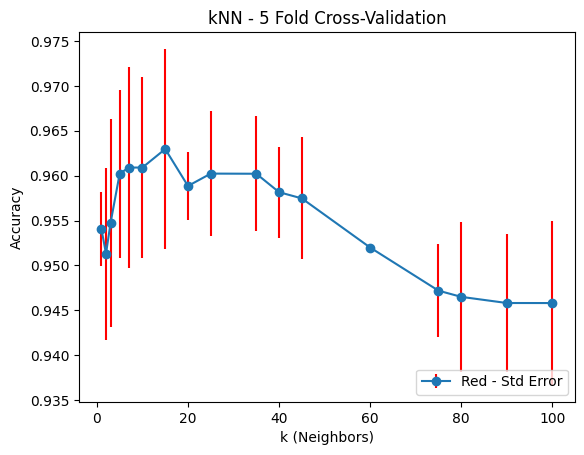

In [136]:
# kNN Classifier with cross-validation
neighbors = [1, 2, 3, 5, 7, 10, 15, 20, 25, 35, 40, 45, 60, 75, 80, 90, 100]
mean_knn_acc = []
std_knn_acc = []
for k_neighbors in neighbors:
    knn_model = KNeighborsClassifier(n_neighbors=k_neighbors, weights='uniform')
    temp_acc = []
    for train_idx, test_idx in kf.split(X_features):
        knn_model.fit(X_features[train_idx], y_labels[train_idx])
        y_pred_knn = knn_model.predict(X_features[test_idx])
        temp_acc.append(accuracy_score(y_labels[test_idx], y_pred_knn))

    mean_knn_acc.append(np.mean(temp_acc))
    std_knn_acc.append(np.std(temp_acc))
    print(f"k: {k_neighbors} => Accuracy: {np.mean(temp_acc):.2f} (+/- {np.std(temp_acc):.2f})")

# Plot kNN accuracy
plt.errorbar(neighbors, mean_knn_acc, yerr=std_knn_acc, ecolor='red', fmt='-o')
plt.legend(["Red - Std Error"], loc=4)
plt.xlabel('k (Neighbors)')
plt.ylabel('Accuracy')
plt.title('kNN - 5 Fold Cross-Validation')
plt.show()

In [137]:
# Train and evaluate confusion_matrix
def evaluate_confusion(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    print(conf_matrix)
    print(f"Accuracy = {accuracy:.2f}")

In [138]:
# Evaluate LR
logistic_final_model = LogisticRegression(C=1)
evaluate_confusion(logistic_final_model, X_poly_final, y_labels)

# Dummy classifiers
most_frequent_model = DummyClassifier(strategy="most_frequent")
random_model = DummyClassifier(strategy="uniform")
evaluate_confusion(most_frequent_model, X_poly_final, y_labels)
evaluate_confusion(random_model, X_poly_final, y_labels)

# kNN evaluation
final_knn_model = KNeighborsClassifier(n_neighbors=60, weights='uniform')
evaluate_confusion(final_knn_model, X_features, y_labels)


[[129   6]
 [  9 294]]
Accuracy = 0.97
[[  0 135]
 [  0 303]]
Accuracy = 0.69
[[ 70  65]
 [138 165]]
Accuracy = 0.54
[[132   3]
 [ 14 289]]
Accuracy = 0.96


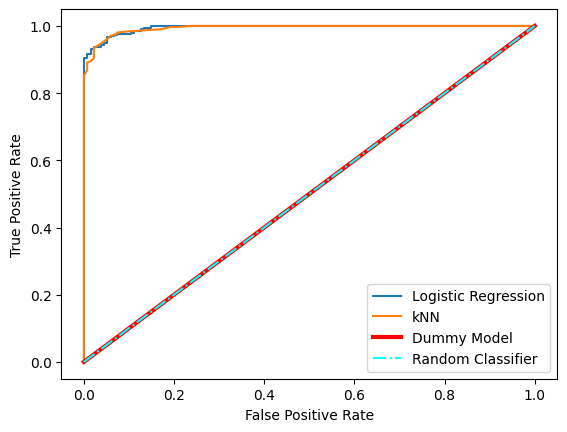

In [139]:
# ROC curve plot
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly_final, y_labels, test_size=0.3, random_state=3)
logistic_model_roc = LogisticRegression(C=10)
logistic_model_roc.fit(X_train_poly, y_train_poly)
y_pred_proba = logistic_model_roc.decision_function(X_test_poly)
false_pos, true_pos, _ = roc_curve(y_test_poly, y_pred_proba)
plt.plot(false_pos, true_pos, label='Logistic Regression')

# kNN ROC curve
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_features, y_labels, test_size=0.3, random_state=3)
knn_model_roc = KNeighborsClassifier(n_neighbors=25)
knn_model_roc.fit(X_train_knn, y_train_knn)
y_pred_knn_proba = knn_model_roc.predict_proba(X_test_knn)
false_pos_knn, true_pos_knn, _ = roc_curve(y_test_knn, y_pred_knn_proba[:, 1])
plt.plot(false_pos_knn, true_pos_knn, label='kNN')

# Dummy ROC curve
dummy_roc_model = DummyClassifier(strategy="most_frequent")
dummy_roc_model.fit(X_train_knn, y_train_knn)
y_pred_dummy_proba = dummy_roc_model.predict_proba(X_test_knn)
false_pos_dummy, true_pos_dummy, _ = roc_curve(y_test_knn, y_pred_dummy_proba[:, 1])
plt.plot(false_pos_dummy, true_pos_dummy, label='Dummy Model', color='red', linewidth=3)

# Final plot 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='cyan', linestyle='-.', label='Random Classifier')
plt.legend()
plt.show()


(1979, 3)
Index(['Feature1', 'Feature2', 'Target'], dtype='object')
   Feature1  Feature2  Target
0     -0.38     -0.98       1
1     -0.15      0.72      -1
2     -0.13     -0.39       1
3      0.51     -0.36      -1
4     -0.24     -0.44       1


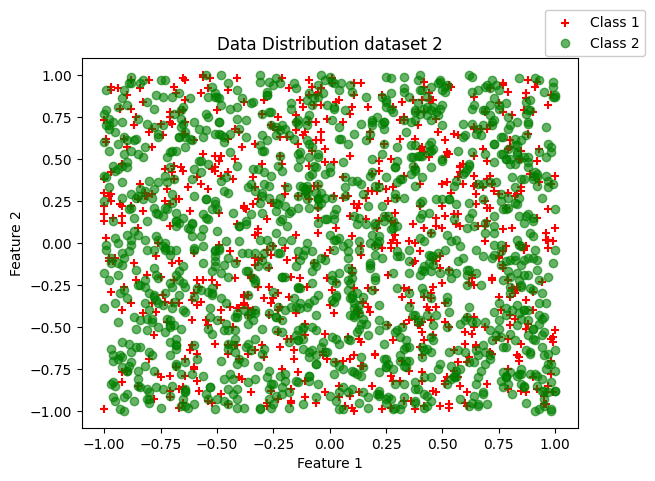

In [140]:
#id : # id:2--4-2-0 

from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, classification_report
import warnings

# Disable warnings
warnings.filterwarnings('ignore')

# Load dataset
data = pd.read_csv('week4_1.csv')
print(data.shape)
data.columns = ['Feature1','Feature2', 'Target']
print(data.columns)
print(data.head())


# Copy data 
df_data = data.copy()
X1 = df_data.iloc[:, 0]
X2 = df_data.iloc[:, 1]
X_features = np.column_stack((X1, X2))
y_labels = df_data.iloc[:, 2]

# Plot initial data
plt.scatter(X1[y_labels < 0], X2[y_labels < 0], marker='+', c='r', label="Class 1")
plt.scatter(X1[y_labels > 0], X2[y_labels > 0], marker='o', c='g', label="Class 2",alpha=0.6)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data Distribution dataset 2' )
plt.legend(bbox_to_anchor=(1.15, 1.15), loc='upper right', fancybox=True, framealpha=1)
plt.show()


Regularization: 0.1, Degree: 1 => Accuracy: 0.65 (+/- 0.01)
Regularization: 0.1, Degree: 2 => Accuracy: 0.65 (+/- 0.01)
Regularization: 0.1, Degree: 3 => Accuracy: 0.65 (+/- 0.01)
Regularization: 0.1, Degree: 4 => Accuracy: 0.65 (+/- 0.01)
Regularization: 0.1, Degree: 5 => Accuracy: 0.65 (+/- 0.01)
Regularization: 0.1, Degree: 6 => Accuracy: 0.65 (+/- 0.01)
Regularization: 0.1, Degree: 7 => Accuracy: 0.65 (+/- 0.01)
Regularization: 0.1, Degree: 8 => Accuracy: 0.65 (+/- 0.01)
Regularization: 0.1, Degree: 9 => Accuracy: 0.65 (+/- 0.01)
Regularization: 0.1, Degree: 10 => Accuracy: 0.65 (+/- 0.01)
Regularization: 0.5, Degree: 1 => Accuracy: 0.65 (+/- 0.01)
Regularization: 0.5, Degree: 2 => Accuracy: 0.65 (+/- 0.01)
Regularization: 0.5, Degree: 3 => Accuracy: 0.65 (+/- 0.01)
Regularization: 0.5, Degree: 4 => Accuracy: 0.65 (+/- 0.01)
Regularization: 0.5, Degree: 5 => Accuracy: 0.65 (+/- 0.01)
Regularization: 0.5, Degree: 6 => Accuracy: 0.65 (+/- 0.01)
Regularization: 0.5, Degree: 7 => Accur

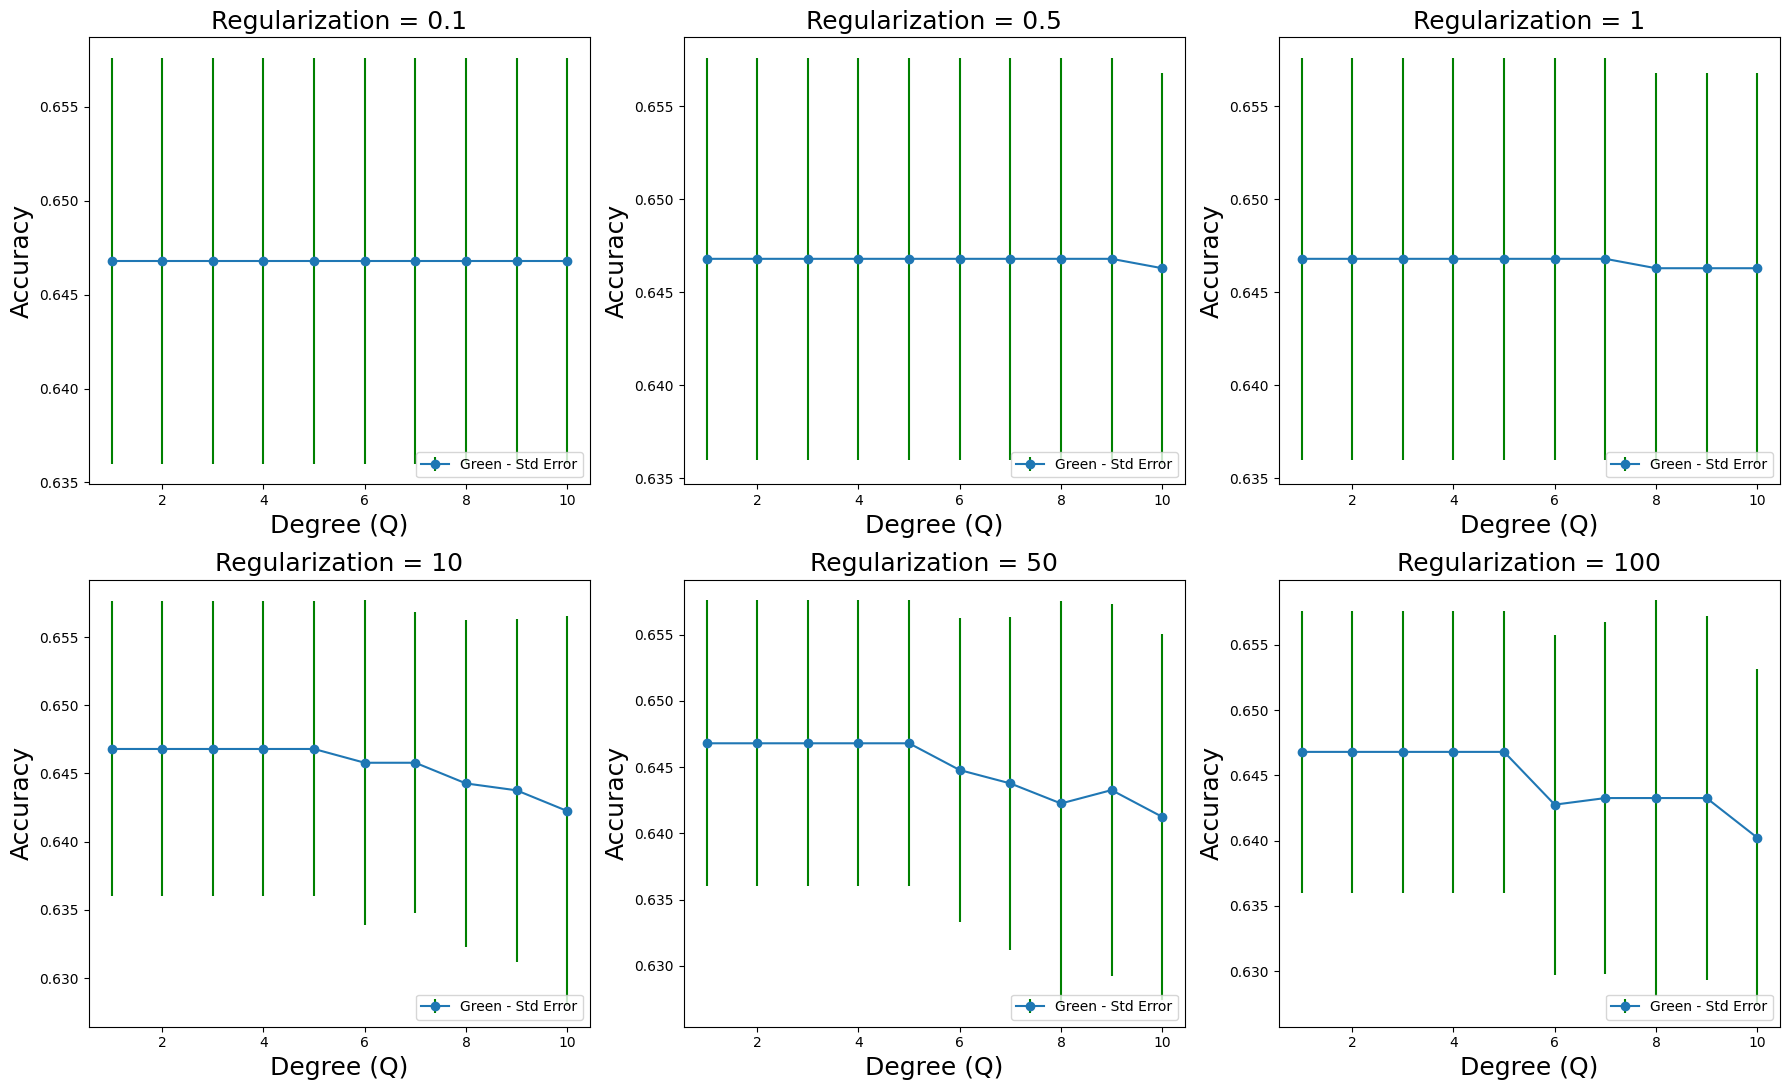

In [148]:
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
penalty_vals = [0.1, 0.5, 1, 10, 50, 100]
kf = KFold(n_splits=5)
accuracy_scores = []

fig, axes = plt.subplots(2, 3, figsize=(18,11))
axes = axes.flatten()
for ix,reg_param in enumerate(penalty_vals):
    poly_means = []
    poly_stds = []
    for deg in degrees:
        X_poly = PolynomialFeatures(deg).fit_transform(X_features)
        temp_accuracy = []
        log_reg_model = LogisticRegression(penalty='l2', C=reg_param, max_iter=10000)
        for train_idx, test_idx in kf.split(X_poly):
            log_reg_model.fit(X_poly[train_idx], y_labels[train_idx])
            y_pred = log_reg_model.predict(X_poly[test_idx])
            temp_accuracy.append(accuracy_score(y_labels[test_idx], y_pred))

        print(f"Regularization: {reg_param}, Degree: {deg} => Accuracy: {np.mean(temp_accuracy):.2f} (+/- {np.std(temp_accuracy):.2f})")
        poly_means.append(np.mean(temp_accuracy))
        poly_stds.append(np.std(temp_accuracy))

    axes[ix].errorbar(degrees, poly_means, yerr=poly_stds, ecolor='g', fmt='-o')
    axes[ix].legend(["Green - Std Error"], loc=4)
    axes[ix].set_xlabel("Degree (Q)",fontsize=18)
    axes[ix].set_ylabel('Accuracy', fontsize=18)
    axes[ix].set_title(f"Regularization = {reg_param}",fontsize=18)
   
plt.tight_layout()
plt.show()

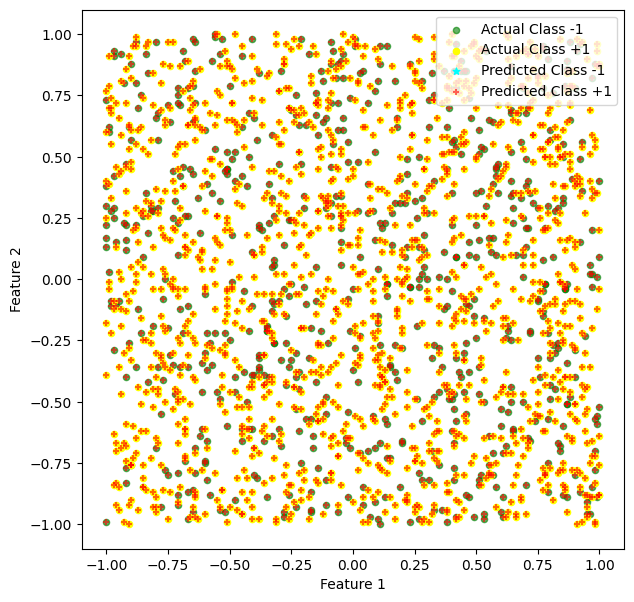

In [142]:
# Final logistic regression model
X_poly_final = PolynomialFeatures(2).fit_transform(X_features)
final_model = LogisticRegression(C=1, random_state=1)
final_model.fit(X_poly_final, y_labels)
y_pred_final = final_model.predict(X_poly_final)

# Plot predicted vs actual
plt.figure(figsize=(7, 7))
plt.scatter(X1[y_labels < 0], X2[y_labels < 0], marker="o", color="green", label="Actual Class -1", s=20 ,alpha=0.6)
plt.scatter(X1[y_labels > 0], X2[y_labels > 0], marker="o", color="yellow", label="Actual Class +1", s=20)
plt.scatter(X1[y_pred_final < 0], X2[y_pred_final < 0], marker="*", color="cyan", label="Predicted Class -1", s=25 )
plt.scatter(X1[y_pred_final > 0], X2[y_pred_final > 0], marker="+", color="red", label="Predicted Class +1", s=15 , alpha=0.6)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper right')
plt.show()


In [143]:
baseline_accuracy = (y_labels == 1).sum() / len(y_labels)
print(f"Baseline accuracy: {baseline_accuracy:.2f}")

Baseline accuracy: 0.65


k: 1 => Accuracy: 0.54 (+/- 0.02)
k: 2 => Accuracy: 0.48 (+/- 0.02)
k: 3 => Accuracy: 0.56 (+/- 0.01)
k: 5 => Accuracy: 0.59 (+/- 0.03)
k: 7 => Accuracy: 0.60 (+/- 0.03)
k: 10 => Accuracy: 0.58 (+/- 0.03)
k: 15 => Accuracy: 0.63 (+/- 0.02)
k: 20 => Accuracy: 0.63 (+/- 0.02)
k: 25 => Accuracy: 0.64 (+/- 0.02)
k: 35 => Accuracy: 0.64 (+/- 0.02)
k: 40 => Accuracy: 0.64 (+/- 0.02)
k: 45 => Accuracy: 0.64 (+/- 0.01)
k: 60 => Accuracy: 0.64 (+/- 0.02)
k: 75 => Accuracy: 0.65 (+/- 0.01)
k: 80 => Accuracy: 0.65 (+/- 0.01)
k: 90 => Accuracy: 0.65 (+/- 0.01)
k: 100 => Accuracy: 0.65 (+/- 0.01)


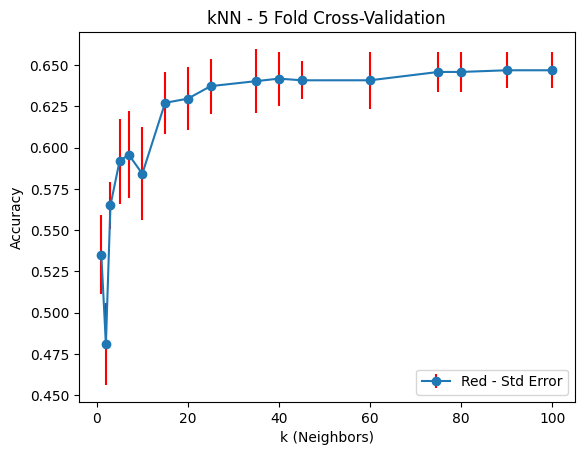

In [144]:
# kNN Classifier with cross-validation
neighbors = [1, 2, 3, 5, 7, 10, 15, 20, 25, 35, 40, 45, 60, 75, 80, 90, 100]
mean_knn_acc = []
std_knn_acc = []
for k_neighbors in neighbors:
    knn_model = KNeighborsClassifier(n_neighbors=k_neighbors, weights='uniform')
    temp_acc = []
    for train_idx, test_idx in kf.split(X_features):
        knn_model.fit(X_features[train_idx], y_labels[train_idx])
        y_pred_knn = knn_model.predict(X_features[test_idx])
        temp_acc.append(accuracy_score(y_labels[test_idx], y_pred_knn))

    mean_knn_acc.append(np.mean(temp_acc))
    std_knn_acc.append(np.std(temp_acc))
    print(f"k: {k_neighbors} => Accuracy: {np.mean(temp_acc):.2f} (+/- {np.std(temp_acc):.2f})")

# Plot kNN accuracy
plt.errorbar(neighbors, mean_knn_acc, yerr=std_knn_acc, ecolor='red', fmt='-o')
plt.legend(["Red - Std Error"], loc=4)
plt.xlabel('k (Neighbors)')
plt.ylabel('Accuracy')
plt.title('kNN - 5 Fold Cross-Validation')
plt.show()

In [145]:
def evaluate_confusion(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    print(conf_matrix)
    print(f"Accuracy = {accuracy:.2f}")

In [146]:
logistic_final_model = LogisticRegression(C=1)
evaluate_confusion(logistic_final_model, X_poly_final, y_labels)

# Dummy classifiers
most_frequent_model = DummyClassifier(strategy="most_frequent")
random_model = DummyClassifier(strategy="uniform")
evaluate_confusion(most_frequent_model, X_poly_final, y_labels)
evaluate_confusion(random_model, X_poly_final, y_labels)

# kNN evaluation
final_knn_model = KNeighborsClassifier(n_neighbors=75, weights='uniform')
evaluate_confusion(final_knn_model, X_features, y_labels)

[[  0 215]
 [  0 379]]
Accuracy = 0.64
[[  0 215]
 [  0 379]]
Accuracy = 0.64
[[108 107]
 [164 215]]
Accuracy = 0.54
[[  1 214]
 [  2 377]]
Accuracy = 0.64


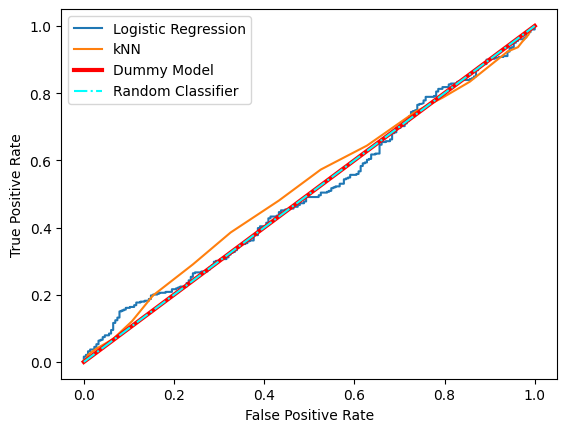

In [147]:
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly_final, y_labels, test_size=0.3, random_state=3)
logistic_model_roc = LogisticRegression(C=5)
logistic_model_roc.fit(X_train_poly, y_train_poly)
y_pred_proba = logistic_model_roc.decision_function(X_test_poly)
false_pos, true_pos, _ = roc_curve(y_test_poly, y_pred_proba)
plt.plot(false_pos, true_pos, label='Logistic Regression')

# kNN ROC curve
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_features, y_labels, test_size=0.3, random_state=3)
knn_model_roc = KNeighborsClassifier(n_neighbors=75)
knn_model_roc.fit(X_train_knn, y_train_knn)
y_pred_knn_proba = knn_model_roc.predict_proba(X_test_knn)
false_pos_knn, true_pos_knn, _ = roc_curve(y_test_knn, y_pred_knn_proba[:, 1])
plt.plot(false_pos_knn, true_pos_knn, label='kNN')

# Dummy ROC curve
dummy_roc_model = DummyClassifier(strategy="most_frequent")
dummy_roc_model.fit(X_train_knn, y_train_knn)
y_pred_dummy_proba = dummy_roc_model.predict_proba(X_test_knn)
false_pos_dummy, true_pos_dummy, _ = roc_curve(y_test_knn, y_pred_dummy_proba[:, 1])
plt.plot(false_pos_dummy, true_pos_dummy, label='Dummy Model', color='red', linewidth=3)

# Final plot 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='cyan', linestyle='-.', label='Random Classifier')
plt.legend()
plt.show()
